In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_cleaned_v5.csv")

Roteiro:
correlacao entre colunas
escolher colunas 
teste para quantidade de clusters
clusters com essa quantia

In [22]:
for i in df.dtypes.items():
    print(i)

('brand_name', dtype('O'))
('model', dtype('O'))
('price', dtype('int64'))
('rating', dtype('float64'))
('has_5g', dtype('bool'))
('has_nfc', dtype('bool'))
('has_ir_blaster', dtype('bool'))
('processor_brand', dtype('O'))
('num_cores', dtype('float64'))
('processor_speed', dtype('float64'))
('battery_capacity', dtype('float64'))
('fast_charging_available', dtype('int64'))
('fast_charging', dtype('float64'))
('ram_capacity', dtype('float64'))
('internal_memory', dtype('float64'))
('screen_size', dtype('float64'))
('refresh_rate', dtype('int64'))
('resolution', dtype('O'))
('num_rear_cameras', dtype('int64'))
('num_front_cameras', dtype('float64'))
('os', dtype('O'))
('primary_camera_rear', dtype('float64'))
('primary_camera_front', dtype('float64'))
('extended_memory_available', dtype('int64'))
('extended_upto', dtype('float64'))


In [31]:
df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['price'], inplace=True)

<AxesSubplot:>

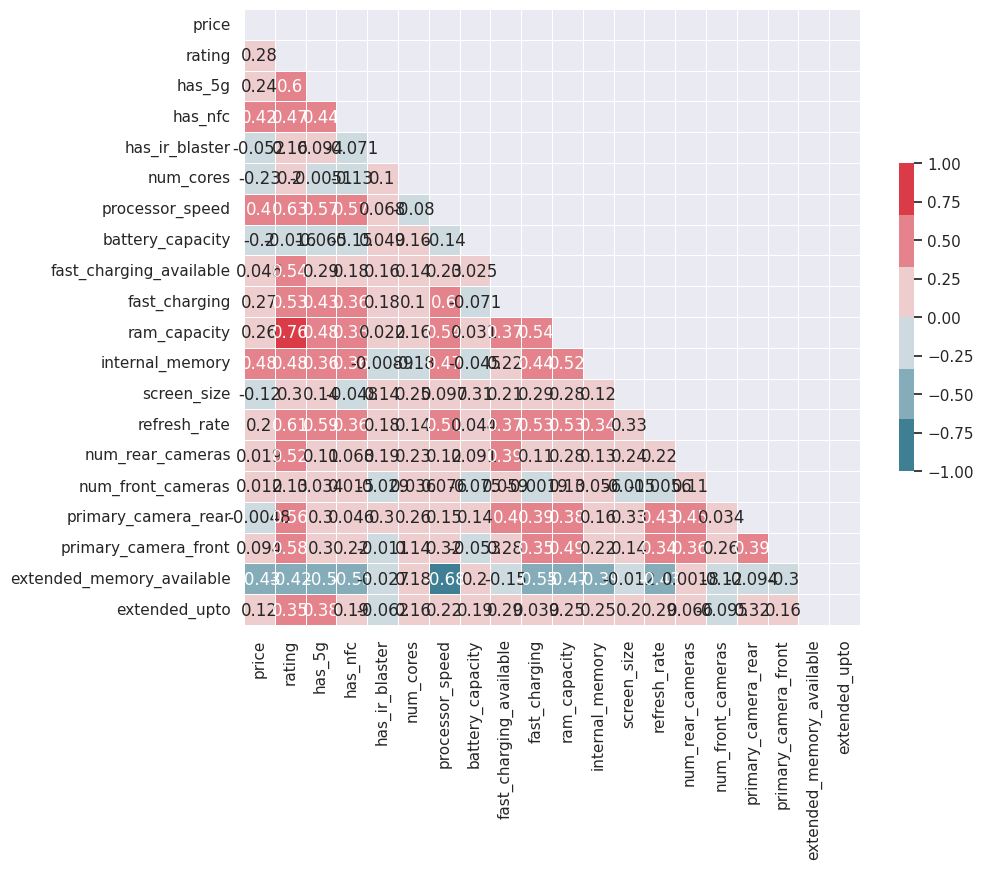

In [32]:
#method{‘pearson’, ‘kendall’, ‘spearman’}
corr = df.corr(method="pearson")
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True
cmap = sns.diverging_palette(220, 10)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap,
vmax=1, vmin=-1, center=0, square=True,
linewidth=.5,cbar_kws={"shrink":.5})

In [33]:
display(df.price.max())
display(df.price.min())
display(df.rating.max())
display(df.rating.min())

650000

3499

89.0

60.0

In [34]:
min_values = df.price.min(axis=0)
max_values = df.price.max(axis=0)
# Normalizar os dados usando a fórmula de normalização min-max
preco = (df.price - min_values) / (max_values - min_values)
preco

0      0.079660
1      0.025507
2      0.020108
3      0.017788
4      0.033256
         ...   
975    0.048710
976    0.017774
977    0.039429
978    0.025508
979    0.033242
Name: price, Length: 879, dtype: float64

In [35]:
min_values = df.rating.min(axis=0)
max_values = df.rating.max(axis=0)
# Normalizar os dados usando a fórmula de normalização min-max
rat = (df.rating - min_values) / (max_values - min_values)
rat

0      1.000000
1      0.724138
2      0.517241
3      0.724138
4      0.758621
         ...   
975    0.793103
976    0.517241
977    0.862069
978    0.689655
979    0.482759
Name: rating, Length: 879, dtype: float64

In [36]:
df1 = pd.concat([preco, rat], axis=1)
df1

,price,rating
0,0.079660,1.000000
1,0.025507,0.724138
2,0.020108,0.517241
3,0.017788,0.724138
4,0.033256,0.758621
...,...,...
975,0.048710,0.793103
976,0.017774,0.517241
977,0.039429,0.862069
978,0.025508,0.689655


Text(0.5, 1.0, 'Elbow curve')

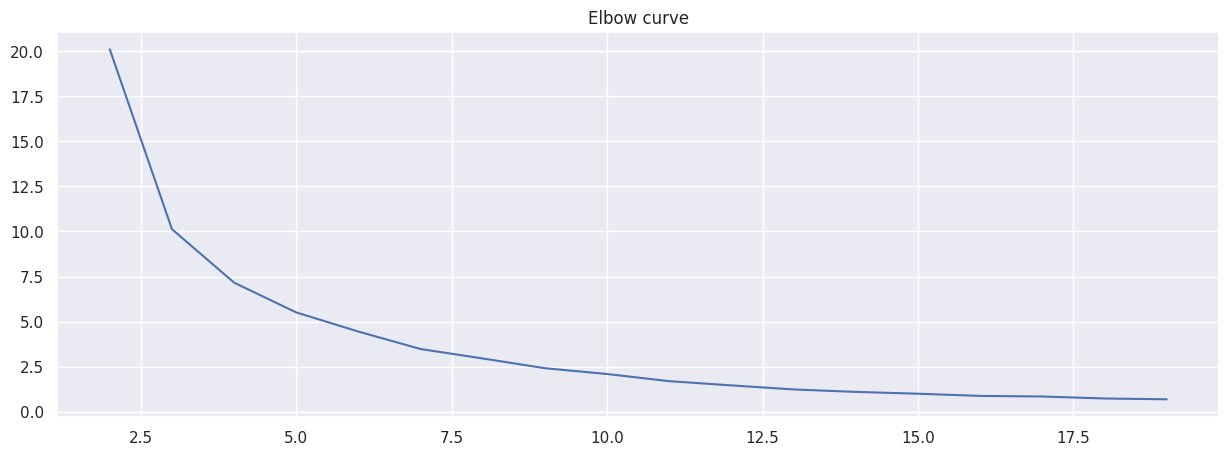

In [37]:
X = df1
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'silhouette')

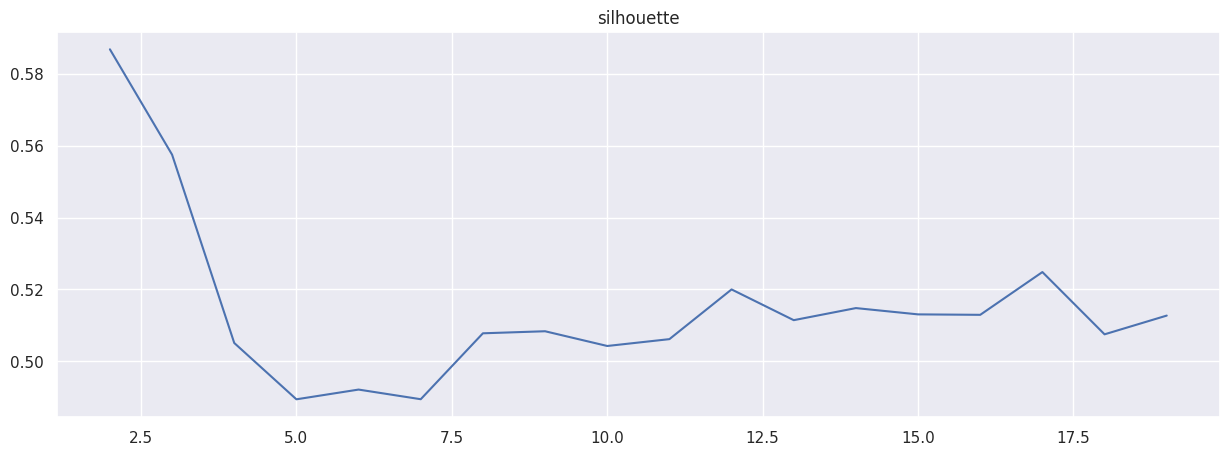

In [38]:
X = df1
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    fitted = kmeans.fit(X)
    distorsions.append(silhouette_score(df1, fitted.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('silhouette')

2 ou 3, fiquei em duvida

In [39]:
from sklearn.mixture import GaussianMixture
nb_components = [2, 3, 4, 5, 6, 7, 8]
aics = []
bics = []
for n in nb_components:
    gm = GaussianMixture(n_components=n, max_iter=1000, random_state=1000)
    gm.fit(X)
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))

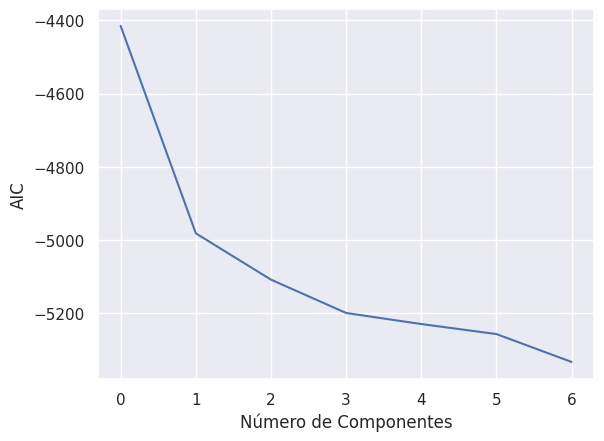

In [40]:
plt_aics = plt.figure()
plt.plot(aics)
plt.xlabel("Número de Componentes")
plt.ylabel("AIC")
plt.show()

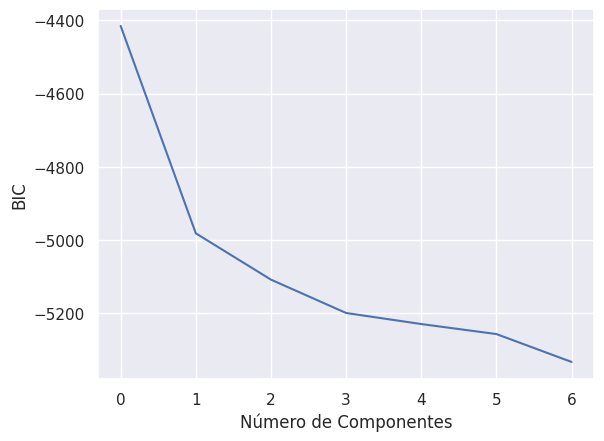

In [41]:
plt_aics = plt.figure()
plt.plot(aics)
plt.xlabel("Número de Componentes")
plt.ylabel("BIC")
plt.show()

In [42]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(df1)

clusters_labels = kmeans.labels_

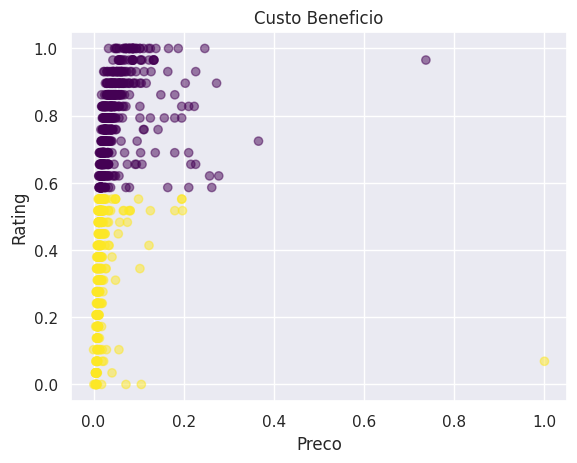

In [43]:
x = df1.price
y = df1.rating

plt.scatter(x, y, c=clusters_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()

In [44]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(df1)

clusters_labels = kmeans.labels_

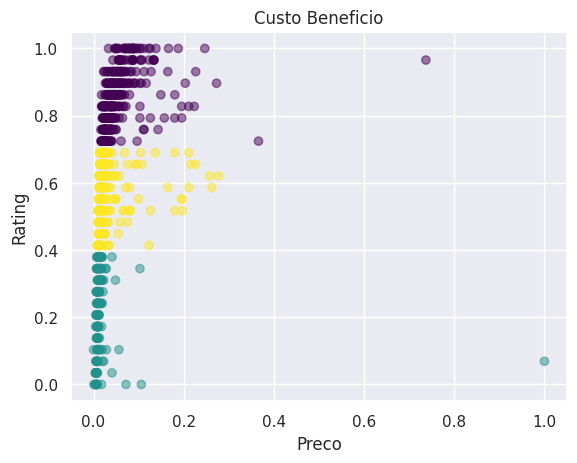

In [46]:
x = df1.price
y = df1.rating

plt.scatter(x, y, c=clusters_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()

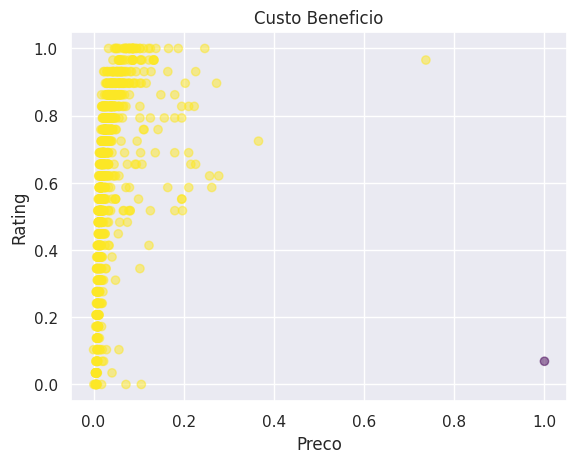

In [52]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5)
dbsy = dbs.fit_predict(df1)
plt.scatter(x, y, c=dbsy, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()